In [1]:
# read csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import os
os.getcwd()

NAFISEH = "Nafiseh"
MOIEN = "Moien"

if "d:" in os.getcwd():
    USER = MOIEN
elif "c:" in os.getcwd():
    USER = NAFISEH
else:
    raise Exception("Unknown user")

USER

'Nafiseh'

In [3]:
if USER == NAFISEH:
    # csv_to_read = 'C:\\Users\\nkakhani\\_Multimodal\\SoilNet-5\\SoilNet\\results\\RUN_D_2023_06_05_T_10_13_Nafiseh.csv'
    # csv_to_read = 'C:\\Users\\nkakhani\\_Multimodal\\SoilNet-5\\SoilNet\\results\\onlytest_D_2023_06_05_T_16_02_Nafiseh.csv' #LSTM
    csv_to_read = 'C:\\Users\\nkakhani\\_Multimodal\\SoilNet-5\\SoilNet\\results\\RF_D_2023_06_06_T_13_27_Nafiseh.csv' #RF
    csv_to_read_name = csv_to_read.split('.')[0]
    csv_to_read_ext = csv_to_read.split('.')[1]
    df = pd.read_csv(csv_to_read)
else:
    csv_to_read = 'D:\\python\\SoilNet\\results\\RF_D_2023_06_06_T_13_27_Nafiseh.csv' #RF
    csv_to_read_name = csv_to_read.split('.')[0]
    csv_to_read_ext = csv_to_read.split('.')[1]
    df = pd.read_csv(csv_to_read)

In [4]:
# get column names
df.columns

Index(['point_id', 'y_true', 'y_pred'], dtype='object')

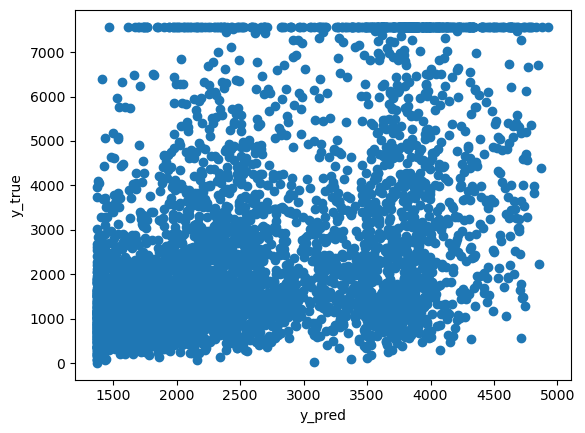

In [5]:
# scatter plotting columns y_pred and y_real
plt.scatter(df['y_pred']*87, df['y_true']*87)
plt.xlabel('y_pred')
plt.ylabel('y_true')
plt.show()



In [6]:
y_pred = df['y_pred'].values 
y_real = df['y_true'].values 
mae = np.abs(y_pred - y_real)
print('MAE: ', np.mean(mae))

MAE:  16.026426638870102


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def plot_mean_mae(y_real, mae, step=5):
    # Calculate the mean MAE for each step
    mean_mae = []
    steps = []
    counts = []
    for i in range(0, int(np.max(y_real)), step):
        mean_mae.append(np.mean(mae[np.logical_and(y_real >= i, y_real < i+step)]))
        count = np.sum(np.logical_and(y_real >= i, y_real < i+step))
        steps.append(f"{i}-{i+step-1}")
        counts.append(count)

    plt.figure(figsize=(20, 10))
    # Create a ScalarMappable object to map colors to counts
    norm = plt.Normalize(min(counts), max(counts))
    cmap = cm.get_cmap('coolwarm')
    sm = cm.ScalarMappable(norm=norm, cmap=cmap)
    sm.set_array([])

    # Plot the bar plot with colored bars
    bars = plt.bar(steps, mean_mae, color=sm.to_rgba(counts))

    # Create a color legend
    cbar = plt.colorbar(sm)
    cbar.set_label('Counts')

    # Rotate x-axis labels
    plt.xticks(rotation=45)

    plt.xlabel('OC Steps')
    plt.ylabel('Mean MAE')
    plt.title('Mean MAE per OC Step')
    plt.show()



C:\Users\nkakhani\AppData\Local\Temp\ipykernel_18388\919499535.py:27: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


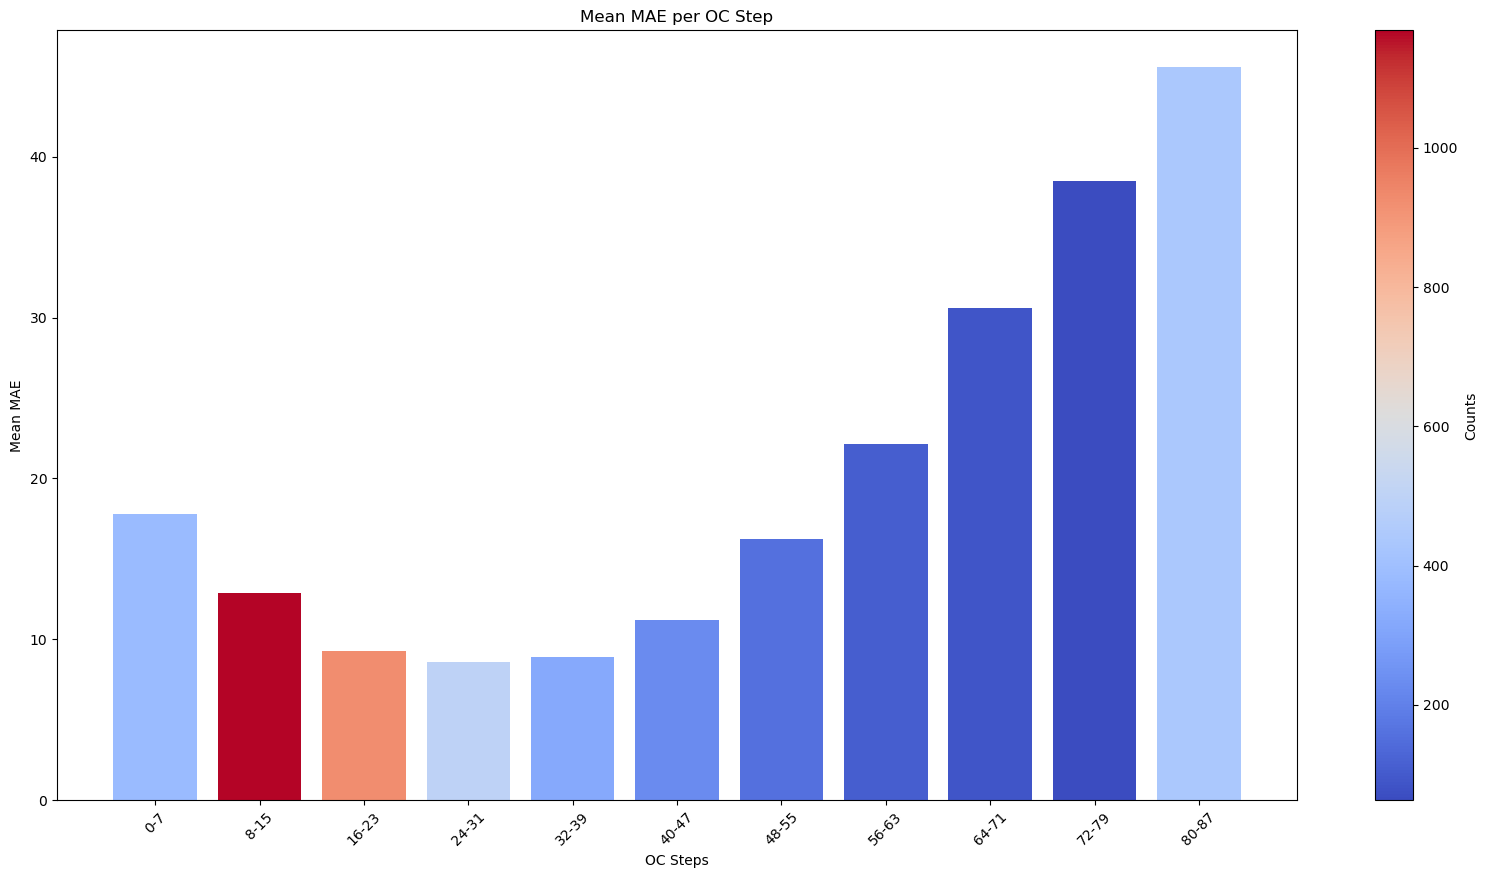

In [8]:
plot_mean_mae(y_real, mae, 8)

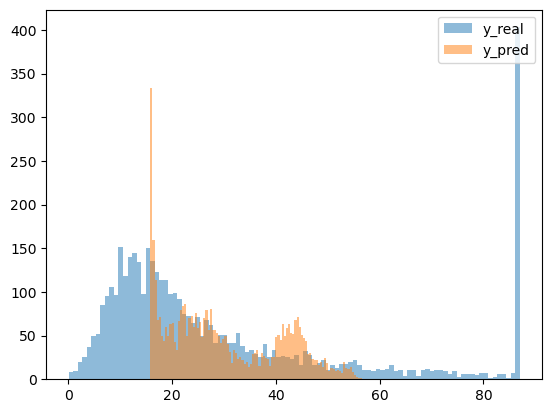

In [9]:
# histogram of y_real and y_pred
plt.hist(df['y_true'], bins=100, alpha=0.5, label='y_real')
plt.hist(df['y_pred'], bins=100, alpha=0.5, label='y_pred')
plt.legend(loc='upper right')
plt.show()


In [10]:
np.max(y_pred/87)

0.6510263422452531

In [11]:
y_pred_new = df['y_pred'].values
# Normalizing y_pred
y_pred_new = (y_pred_new - np.min(y_pred_new)) / (np.max(y_pred_new) - np.min(y_pred_new))
# y_pred_new = y_pred_new * 87

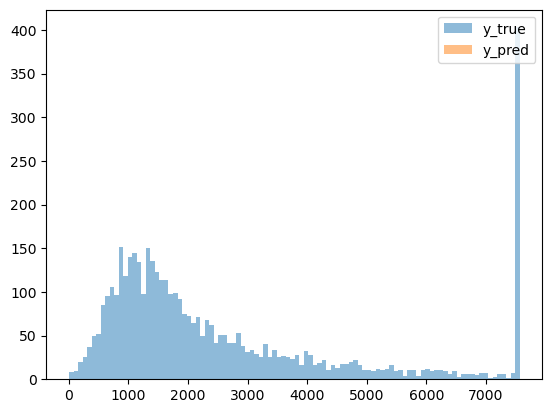

In [12]:
# histogram of y_real and y_pred
plt.hist(df['y_true']*87, bins=100, alpha=0.5, label='y_true')
plt.hist(y_pred_new, bins=100, alpha=0.5, label='y_pred')
plt.legend(loc='upper right')
plt.show()


## Saving the stretched csv

In [13]:
# # replace y_pred_new with y_pred in df
# df['y_pred'] = y_pred_new
# df['y_true'] = df['y_true'] * 87
# # save df as csv 
# df.to_csv(csv_to_read_name + "_streched." + csv_to_read_ext, index=False)

In [14]:
# MAE between y_real and y_pred_new
mae = np.abs(y_pred_new - y_real)
print('MAE: ', np.mean(mae))

MAE:  29.9951320732168


In [15]:
np.max(y_real)

87.0

In [16]:
# r2 score
from sklearn.metrics import r2_score
r2_score(y_real, y_pred_new), r2_score(y_real, y_pred)

(-1.4924764237319281, 0.24519819140577015)

In [17]:
if USER == NAFISEH:
    # csv_to_read = 'C:\\Users\\nkakhani\\_Multimodal\\SoilNet-5\\SoilNet\\results\\RUN_D_2023_06_05_T_10_13_Nafiseh.csv'
    lstm = 'C:\\Users\\nkakhani\\_Multimodal\\SoilNet-5\\SoilNet\\results\\onlytest_D_2023_06_05_T_16_02_Nafiseh.csv' #LSTM
    rf = 'C:\\Users\\nkakhani\\_Multimodal\\SoilNet-5\\SoilNet\\results\\RF_D_2023_06_06_T_13_27_Nafiseh.csv' #RF
else:
    rf = 'D:\\python\\SoilNet\\results\\RF_D_2023_06_06_T_13_27_Nafiseh.csv' #RF
    lstm = "D:\\python\\SoilNet\\results\\onlytest_D_2023_06_05_T_16_02_Nafiseh.csv"

In [18]:
import pandas as pd
rf_df = pd.read_csv(rf)
rf_df = rf_df.rename(columns={'y_pred': 'y_rf'})
lstm_df = pd.read_csv(lstm)
lstm_df = lstm_df.rename(columns={'y_pred': 'y_lstm'})

In [19]:
print(rf_df.keys(), lstm_df.keys())

Index(['point_id', 'y_true', 'y_rf'], dtype='object') Index(['point_id', 'y_real', 'y_lstm'], dtype='object')


In [20]:
merged_df = pd.merge(rf_df, lstm_df, on='point_id')
len(merged_df)

4371

In [21]:
merged_df = merged_df[merged_df['y_real'] != 1.0]
merged_df['y_real'] = merged_df['y_real'] * 87
merged_df['y_lstm'] = merged_df['y_lstm'] * 87
merged_df

,point_id,y_true,y_rf,y_real,y_lstm
0,26601784,48.0,44.714762,48.000000,22.796561
1,26601978,25.2,29.236940,25.200001,12.829623
2,26761768,38.9,33.805373,38.900001,18.770602
3,26802028,4.7,40.583731,4.700000,23.099216
4,26921850,12.1,27.408651,12.100000,24.471550
...,...,...,...,...,...
4366,64621658,11.1,23.678901,11.099999,8.435805
4367,64661656,3.1,24.504383,3.100000,9.747550
4368,64841666,6.4,25.481218,6.400000,5.887181
4369,64901668,10.8,23.319461,10.800000,5.871338


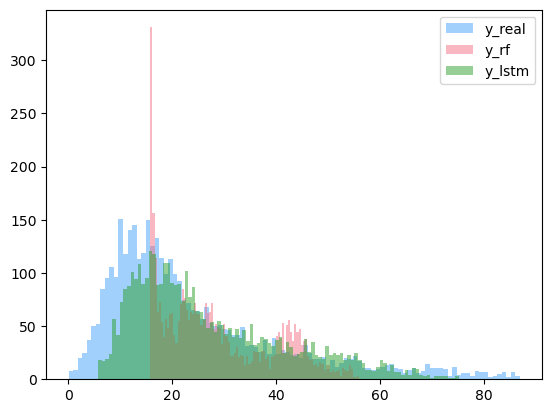

In [22]:
colors = ['#43a2f8', '#f27085', '#2ca02c']

plt.hist(merged_df['y_real'], bins=100, alpha=0.5, label='y_real', color=colors[0])
plt.hist(merged_df['y_rf'], bins=100, alpha=0.5, label='y_rf', color=colors[1])
plt.hist(merged_df['y_lstm'], bins=100, alpha=0.5, label='y_lstm', color=colors[2])
plt.legend(loc='upper right')
plt.show()

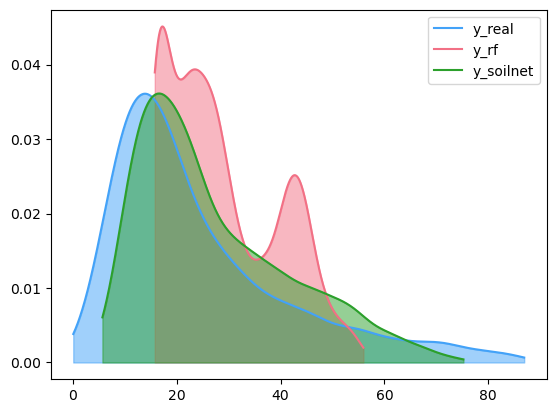

In [23]:
from scipy.stats import gaussian_kde

colors = ['#43a2f8', '#f27085', '#2ca02c']

# Smooth the histograms using a Gaussian kernel density estimate
kde_real = gaussian_kde(merged_df['y_real'])
kde_rf = gaussian_kde(merged_df['y_rf'])
kde_lstm = gaussian_kde(merged_df['y_lstm'])

# Create a range of values to evaluate the density estimates
x_real = np.linspace(merged_df['y_real'].min(), merged_df['y_real'].max(), 1000)
x_rf = np.linspace(merged_df['y_rf'].min(), merged_df['y_rf'].max(), 1000)
x_lstm = np.linspace(merged_df['y_lstm'].min(), merged_df['y_lstm'].max(), 1000)

# Plot the smoothed histograms with lines and filled areas
plt.plot(x_real, kde_real(x_real), color=colors[0], label='y_real')
plt.fill_between(x_real, kde_real(x_real), alpha=0.5, color=colors[0])
plt.plot(x_rf, kde_rf(x_rf), color=colors[1], label='y_rf')
plt.fill_between(x_rf, kde_rf(x_rf), alpha=0.5, color=colors[1])
plt.plot(x_lstm, kde_lstm(x_lstm), color=colors[2], label='y_soilnet')
plt.fill_between(x_lstm, kde_lstm(x_lstm), alpha=0.5, color=colors[2])
plt.legend(loc='upper right')
plt.show()

In [24]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KernelDensity

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as grid_spec

In [27]:
# data = pd.read_csv("C:\\Users\\moi3n\\Downloads\\mock-european-test-results.csv")

In [26]:
countries = [x for x in np.unique(data.country)]
country = countries[0]
x = np.array(data[data.country == country].score)
x.shape

NameError: name 'data' is not defined

In [ ]:
np.min(x), np.max(x), np.mean(x)

In [28]:
kde_real = merged_df['y_real']
kde_rf = merged_df['y_rf']
kde_lstm = merged_df['y_lstm']
print(kde_real.shape, kde_rf.shape, kde_lstm.shape)
# convert to numpy array
kde_real = np.array(kde_real)
kde_rf = np.array(kde_rf)
kde_lstm = np.array(kde_lstm)
# reshape to column vector
# kde_real = kde_real.reshape(-1, 1)
# kde_rf = kde_rf.reshape(-1, 1)
# kde_lstm = kde_lstm.reshape(-1, 1)
print(kde_real.shape, kde_rf.shape, kde_lstm.shape)

(3971,) (3971,) (3971,)
(3971,) (3971,) (3971,)


In [29]:
print(np.min(kde_real), np.max(kde_real))
print(np.min(kde_rf), np.max(kde_rf))
print(np.min(kde_lstm), np.max(kde_lstm))


0.0999999996274641 86.90000081062317
15.790625746610027 55.944716519595225
5.709499843418592 75.19800585508347


In [30]:
names = ["Observed ", "RF", "SoilNet"]
colors = ['#0079FF', '#FF0060', '#00DFA2']
values = [kde_real, kde_rf, kde_lstm]
np.min(values[1]), np.max(values[1])

(15.790625746610027, 55.944716519595225)

In [31]:
kde_real[:, None].shape

(3971, 1)

x_d.shape: (1000,), x.shape: (3971,)
x_kde.shape: (1000,), x_d.shape: (1000,)
x_d.shape: (1000,), x.shape: (3971,)
x_kde.shape: (1000,), x_d.shape: (1000,)
x_d.shape: (1000,), x.shape: (3971,)
x_kde.shape: (1000,), x_d.shape: (1000,)


C:\Users\nkakhani\AppData\Local\Temp\ipykernel_18388\635405078.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


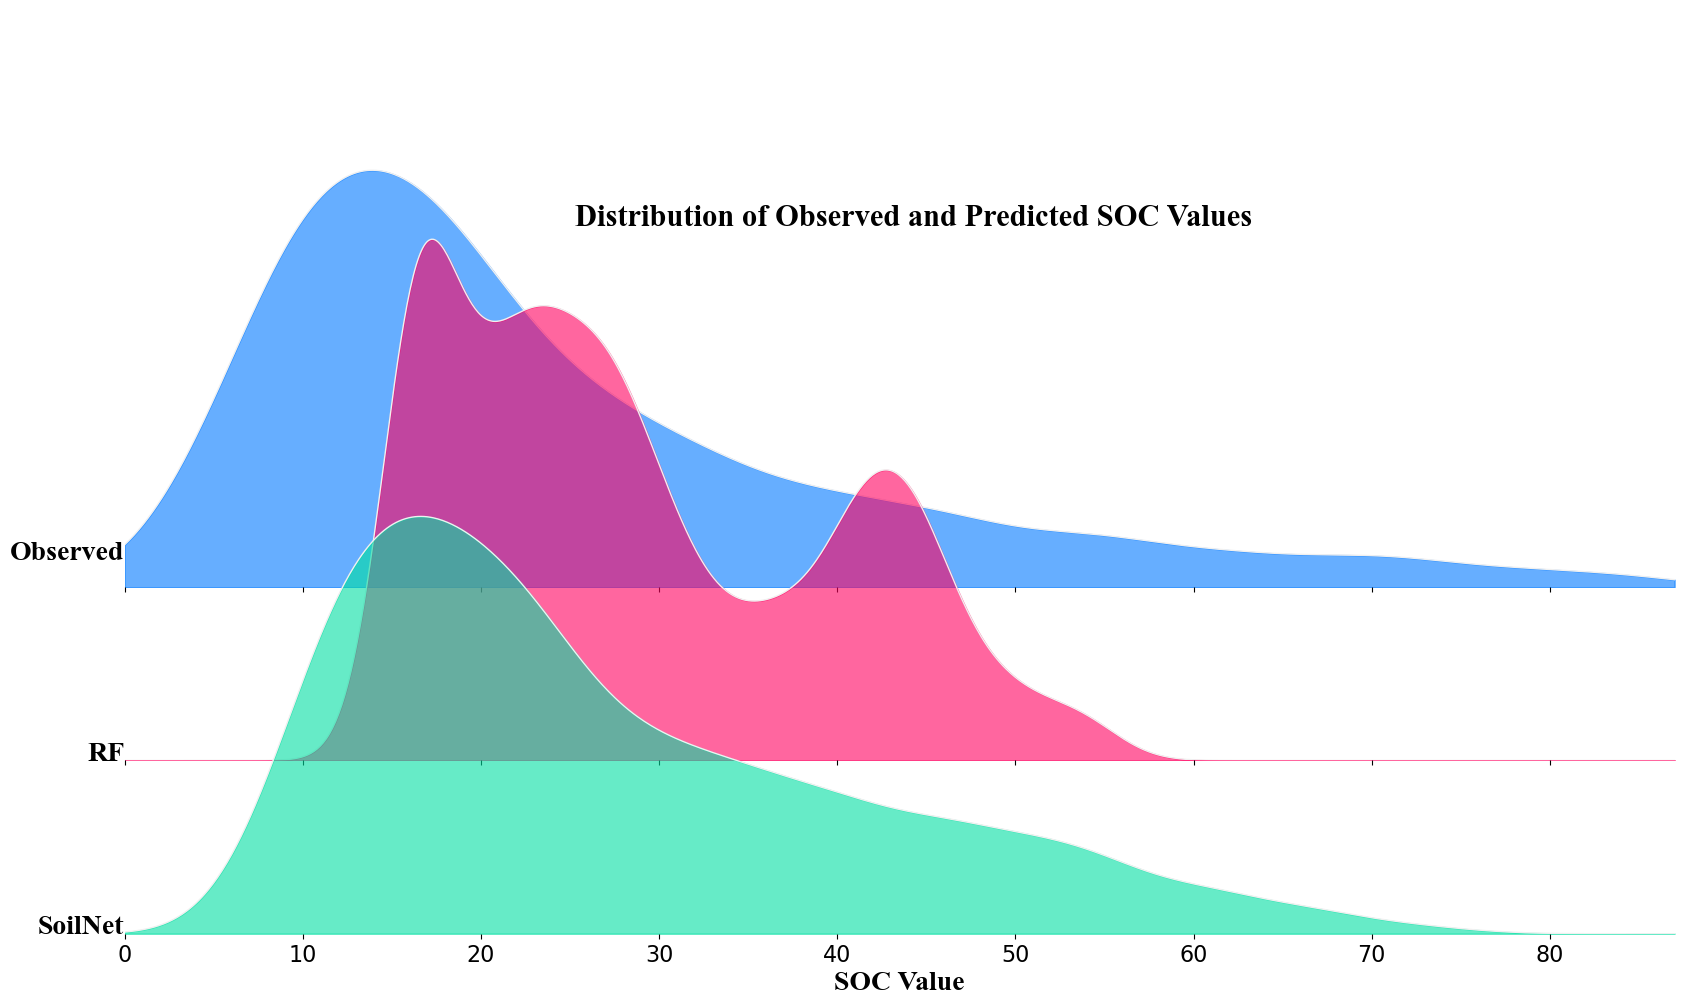

In [33]:
gs = grid_spec.GridSpec(len(names),1)
fig = plt.figure(figsize=(20,12))

i = 0

ax_objs = []
for k, name in enumerate(names):
    x = values[k]
    x_d = np.linspace(0, 87, 1000)
    print(f"x_d.shape: {x_d.shape}, x.shape: {x.shape}")
    #kde = KernelDensity(bandwidth=0.03, kernel='gaussian')
    #kde.fit(x.reshape((-1, 1)))

    x_kde = gaussian_kde(x)
    x_kde = x_kde(x_d).reshape(-1, 1).squeeze()
    x_d = x_d.reshape(-1, 1).squeeze()
    print(f"x_kde.shape: {x_kde.shape}, x_d.shape: {x_d.shape}")

    #logprob = kde.score_samples(x_d.reshape(-1, 1))
    #print(np.min(logprob), np.max(logprob))
    # creating new axes object
    ax_objs.append(fig.add_subplot(gs[i:i+1, 0:]))

    #print(np.exp(logprob).shape, np.min(np.exp(logprob)), np.max(np.exp(logprob)))
    # plotting the distribution
    ax_objs[-1].plot(x_d,x_kde,color="#f0f0f0",lw=1,alpha=1.0)
    ax_objs[-1].fill_between(x_d, x_kde, alpha=0.6,color=colors[i])
    ax_objs[-1].tick_params(axis='x', labelsize=16)


    # setting uniform x and y lims
    ax_objs[-1].set_xlim(0, 87)
    ax_objs[-1].set_ylim(0,0.05)

    # make background transparent
    rect = ax_objs[-1].patch
    rect.set_alpha(0)

    # remove borders, axis ticks, and labels
    ax_objs[-1].set_yticklabels([])
    ax_objs[-1].set_yticks([])
    if i == len(names)-1:
        ax_objs[-1].set_xlabel("SOC Value", fontsize=20,fontweight="bold", fontfamily="Times New Roman")
    else:
        ax_objs[-1].set_xticklabels([])

    spines = ["top","right","left","bottom"]
    for s in spines:
        ax_objs[-1].spines[s].set_visible(False)

    adj_name = name.replace(" ","\n")
    ax_objs[-1].text(-0.02, 0, adj_name, fontweight="bold", fontsize=20, ha="right", fontfamily="Times New Roman")


    i += 1

gs.update(hspace=-0.7)

fig.text(0.35,0.7,"Distribution of Observed and Predicted SOC Values",fontsize=22, fontfamily="Times New Roman", fontweight="bold")

plt.tight_layout()
plt.show()